In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib

In [2]:
data_path = "data/processed/dataset.csv" 
df = pd.read_csv(data_path)
print(" Dataset loaded successfully. Shape:", df.shape)

 Dataset loaded successfully. Shape: (93206, 25)


In [3]:
df = df.drop_duplicates()
df = df.dropna()
print(" Missing values and duplicates removed.")
print("Remaining shape:", df.shape)

 Missing values and duplicates removed.
Remaining shape: (45784, 25)


In [4]:
X = df.select_dtypes(include=['float64', 'int64'])
print(" Selected numeric features. Shape:", X.shape)

 Selected numeric features. Shape: (45784, 25)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(" Data scaled (mean=0, std=1).")

 Data scaled (mean=0, std=1).


In [7]:
# DBSCAN Run 1
# -------------------------
dbscan1 = DBSCAN(eps=3, min_samples=5)
labels1 = dbscan1.fit_predict(X_scaled)

n_clusters1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise1 = list(labels1).count(-1)
sil_score1 = silhouette_score(X_scaled, labels1) if n_clusters1 > 1 else "Not defined"
db_score1 = davies_bouldin_score(X_scaled, labels1) if n_clusters1 > 1 else "Not defined"

print("DBSCAN Run 1")
print(f"Number of clusters: {n_clusters1}")
print(f"Number of noise points: {n_noise1}")
print(f"Silhouette Score: {sil_score1}")
print(f"Davies-Bouldin Score: {db_score1}")

DBSCAN Run 1
Number of clusters: 119
Number of noise points: 160
Silhouette Score: 0.21333267917233445
Davies-Bouldin Score: 1.2790738052443065


In [8]:
# DBSCAN Run 2
dbscan2 = DBSCAN(eps=2.5, min_samples=5)
labels2 = dbscan2.fit_predict(X_scaled)

n_clusters2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise2 = list(labels2).count(-1)
sil_score2 = silhouette_score(X_scaled, labels2) if n_clusters2 > 1 else "Not defined"
db_score2 = davies_bouldin_score(X_scaled, labels2) if n_clusters2 > 1 else "Not defined"

print("\nDBSCAN Run 2")
print(f"Number of clusters: {n_clusters2}")
print(f"Number of noise points: {n_noise2}")
print(f"Silhouette Score: {sil_score2}")
print(f"Davies-Bouldin Score: {db_score2}")


DBSCAN Run 2
Number of clusters: 181
Number of noise points: 275
Silhouette Score: 0.17071877467791804
Davies-Bouldin Score: 1.304805344768952


In [9]:
# DBSCAN Run 3
# -------------------------
dbscan3 = DBSCAN(eps=3, min_samples=10)
labels3 = dbscan3.fit_predict(X_scaled)

n_clusters3 = len(set(labels3)) - (1 if -1 in labels3 else 0)
n_noise3 = list(labels3).count(-1)
sil_score3 = silhouette_score(X_scaled, labels3) if n_clusters3 > 1 else "Not defined"
db_score3 = davies_bouldin_score(X_scaled, labels3) if n_clusters3 > 1 else "Not defined"

print("\nDBSCAN Run 3")
print(f"Number of clusters: {n_clusters3}")
print(f"Number of noise points: {n_noise3}")
print(f"Silhouette Score: {sil_score3}")
print(f"Davies-Bouldin Score: {db_score3}")


DBSCAN Run 3
Number of clusters: 97
Number of noise points: 375
Silhouette Score: 0.21063982259088054
Davies-Bouldin Score: 1.4300801707631567


In [11]:
joblib.dump(labels1, "dbscan_labels_test1.pkl")
joblib.dump(labels2, "dbscan_labels_test2.pkl")
joblib.dump(labels3, "dbscan_labels_test3.pkl")
print("\n Model results saved successfully!")


 Model results saved successfully!


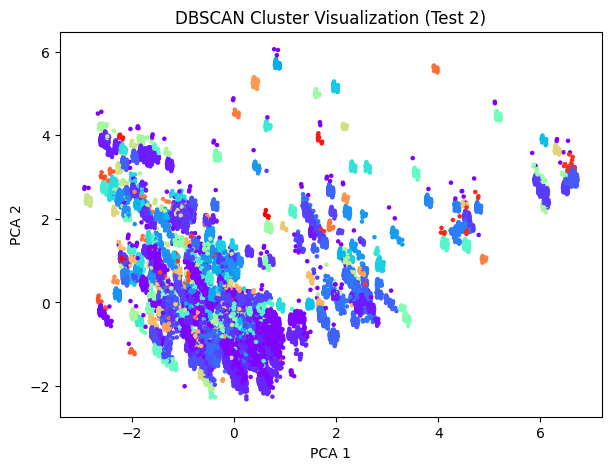

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels2, cmap='rainbow', s=5)
plt.title("DBSCAN Cluster Visualization (Test 2)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()